In [60]:
import scanpy as sc

# Fix export PDF as text issue
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [61]:
%reload_ext autoreload
%autoreload 2


In [62]:
cd ..

/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks


In [63]:
from utils import *

In [64]:
cd revision

/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/revision


In [65]:
ad = sc.read_h5ad('morse_n_adams_n_bal_scvi_patient.id_138341_400_revision.h5da')

Based on new annotations provided by Oliver, we update the mdm.type annotation

In [66]:
ad.obs[ad.obs['study'] == 'budinger']['patient.id'].value_counts()

Case 1    12258
PMB 1      5309
PMB 2      5243
001C          0
238CO         0
          ...  
137CO         0
137C          0
135I          0
133C          0
SC156         0
Name: patient.id, Length: 104, dtype: int64

In [67]:
# check the cell proportions

In [68]:
counts_adams = ad.obs[ad.obs['study'] == 'adams']['disease.status'].value_counts()
counts_adams / counts_adams.sum()

COPD        0.333333
IPF         0.333333
control     0.333333
BAL (NA)    0.000000
covid       0.000000
Name: disease.status, dtype: float64

In [69]:
print(counts_adams)
print(counts_adams / counts_adams.sum())

COPD        30159
IPF         30159
control     30159
BAL (NA)        0
covid           0
Name: disease.status, dtype: int64
COPD        0.333333
IPF         0.333333
control     0.333333
BAL (NA)    0.000000
covid       0.000000
Name: disease.status, dtype: float64


In [70]:
counts_morse = ad.obs[ad.obs['study'] == 'morse']['disease.status'].value_counts()
counts_morse / sum(counts_morse)

control     0.527035
IPF         0.472965
BAL (NA)    0.000000
COPD        0.000000
covid       0.000000
Name: disease.status, dtype: float64

In [71]:
print(counts_morse)
print(counts_morse / sum(counts_morse))

control     9250
IPF         8301
BAL (NA)       0
COPD           0
covid          0
Name: disease.status, dtype: int64
control     0.527035
IPF         0.472965
BAL (NA)    0.000000
COPD        0.000000
covid       0.000000
Name: disease.status, dtype: float64


In [72]:
counts_morse

control     9250
IPF         8301
BAL (NA)       0
COPD           0
covid          0
Name: disease.status, dtype: int64

In [73]:
counts_bal = ad.obs[ad.obs['study'] == 'BAL']['disease.status'].value_counts()
counts_bal / sum(counts_bal)

BAL (NA)    1.0
COPD        0.0
IPF         0.0
control     0.0
covid       0.0
Name: disease.status, dtype: float64

In [74]:
counts_morse = ad.obs[ad.obs['study'] == 'morse']['disease.status'].value_counts()
counts_morse / sum(counts_morse)

control     0.527035
IPF         0.472965
BAL (NA)    0.000000
COPD        0.000000
covid       0.000000
Name: disease.status, dtype: float64

In [75]:
ad.obs['study'].value_counts()

adams       90477
budinger    22810
morse       17551
BAL          7503
Name: study, dtype: int64

In [76]:
ad.shape

(138341, 17656)

In [77]:
print('here...')
import datetime
print(datetime.datetime.now())

here...
2021-06-22 15:58:46.050592


### add the mdm annotation

In [78]:
bal = get_bal()

bal


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future

adding annotation from bal mdm...
scoring genes...
scoring MP.markers 20


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


scoring MP.others 10


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


scoring MP.all 31


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [79]:
bal.obs.index

Index(['AAACCCACAAGCAATA-2', 'AAAGAACGTGTCCGTG-2', 'AAAGGGCCAAGCGCAA-2',
       'AAAGGGCCAGCGAGTA-2', 'AAAGGTACACGGTGTC-2', 'AAAGTCCCAAGGCCTC-2',
       'AAAGTCCCACATACTG-2', 'AAAGTCCTCCTCAGGG-2', 'AAAGTCCTCTTGAGCA-2',
       'AAAGTGAGTTACCCTC-2',
       ...
       'TTCCTAAAGTGCTCAT-8', 'TTCCTCTCATCAGTCA-8', 'TTGATGGAGTTGCTGT-8',
       'TTGCCTGAGCAACAAT-8', 'TTGGATGTCAACCGAT-8', 'TTGGGATCAGCTACTA-8',
       'TTTGACTAGGTTCTTG-8', 'TTTGGTTCAAGTGCTT-8', 'TTTGTTGCAATGAGCG-8',
       'TTTGTTGGTAGTAAGT-8'],
      dtype='object', length=7503)

In [80]:
bal_mdm = sc.read_h5ad('../data/bal/bal_mdm.h5ad')
bal.obs['mdm.type'] = bal.obs.index.map(bal_mdm.obs.Cluster.to_dict())
bal.obs['mdm.type'].value_counts()

MDM 2        2006
MDM 3B       1518
MDM 3A       1426
MDM 1        1023
AM 2          929
AM 1          168
Undefined      75
Name: mdm.type, dtype: int64

In [81]:
# here we update the annotation based on labels that Oliver provided on 03.15.2021
annot_new = pd.read_csv('BAL-Mac_labels.csv', index_col=0)
annot_new['found'] = annot_new.index.isin(bal.obs.index)

bal.obs['mdm.type'] = bal.obs.index.map(annot_new['x'].to_dict())
annot_new['x'].value_counts()

2 Mono/Mp          3002
3 SPP1/LGMN-Mp     1274
5 INHBA-AMp        1064
1 FCN1-Mono        1027
4 SPP1/TREM2-Mp     866
6 Prolif. AMp       207
Low quality         148
Name: x, dtype: int64

In [82]:
budinger = ad[ad.obs['study'] == 'budinger',:]

In [83]:
budinger.obs['patient.id'].value_counts()

Case 1    12258
PMB 1      5309
PMB 2      5243
Name: patient.id, dtype: int64

In [84]:
ad.obs[ad.obs['study'] == 'budinger']['patient.id'].value_counts().head(100)

Case 1    12258
PMB 1      5309
PMB 2      5243
001C          0
238CO         0
          ...  
153CO         0
152CO         0
145I          0
138I          0
137CO         0
Name: patient.id, Length: 100, dtype: int64

In [85]:
bal.obs['mdm.type'].value_counts()

2 Mono/Mp          2951
3 SPP1/LGMN-Mp     1190
1 FCN1-Mono         992
5 INHBA-AMp         916
4 SPP1/TREM2-Mp     819
6 Prolif. AMp       175
Low quality         102
Name: mdm.type, dtype: int64

In [86]:
np.bincount(annot_new.index.isin(bal.obs.index))

array([ 443, 7145])

In [87]:
bal.shape

(7503, 27007)

In [88]:
bal.obs['mdm.type'] = np.where(pd.isnull(bal.obs['mdm.type']), 'Others (COVID)', bal.obs['mdm.type'])
bal.obs['mdm.type'].value_counts()


2 Mono/Mp          2951
3 SPP1/LGMN-Mp     1190
1 FCN1-Mono         992
5 INHBA-AMp         916
4 SPP1/TREM2-Mp     819
Others (COVID)      358
6 Prolif. AMp       175
Low quality         102
Name: mdm.type, dtype: int64

In [89]:
ad.obs[ad.obs['study'] == 'BAL'].index

Index(['AAACCCACAAGCAATA-2-1-0-0-0-0', 'AAAGAACGTGTCCGTG-2-1-0-0-0-0',
       'AAAGGGCCAAGCGCAA-2-1-0-0-0-0', 'AAAGGGCCAGCGAGTA-2-1-0-0-0-0',
       'AAAGGTACACGGTGTC-2-1-0-0-0-0', 'AAAGTCCCAAGGCCTC-2-1-0-0-0-0',
       'AAAGTCCCACATACTG-2-1-0-0-0-0', 'AAAGTCCTCCTCAGGG-2-1-0-0-0-0',
       'AAAGTCCTCTTGAGCA-2-1-0-0-0-0', 'AAAGTGAGTTACCCTC-2-1-0-0-0-0',
       ...
       'TTCCTAAAGTGCTCAT-8-1-0-0-0-0', 'TTCCTCTCATCAGTCA-8-1-0-0-0-0',
       'TTGATGGAGTTGCTGT-8-1-0-0-0-0', 'TTGCCTGAGCAACAAT-8-1-0-0-0-0',
       'TTGGATGTCAACCGAT-8-1-0-0-0-0', 'TTGGGATCAGCTACTA-8-1-0-0-0-0',
       'TTTGACTAGGTTCTTG-8-1-0-0-0-0', 'TTTGGTTCAAGTGCTT-8-1-0-0-0-0',
       'TTTGTTGCAATGAGCG-8-1-0-0-0-0', 'TTTGTTGGTAGTAAGT-8-1-0-0-0-0'],
      dtype='object', length=7503)

In [90]:
ad.obs['mdm.type'] = np.where(ad.obs['study'] == 'BAL', ad.obs.index.str[:-10].map(bal.obs['mdm.type'].to_dict()), 'Others (COVID)')
ad.obs['mdm.type'] = np.where(ad.obs['study'] != 'BAL', 'Others (A/M/B)', ad.obs['mdm.type'])
# bal.obs['mdm.type'] = np.where(pd.isnull(bal.obs['mdm.type']), 'Others (COVID)', bal.obs['mdm.type'])
# ad.obs['mdm.type'] = np.where(ad.obs['study'] == 'BAL', ad.obs.index.str[:-4].map(bal.obs['mdm.type'].to_dict()), 'Others (Adams/Morse)')

In [91]:
ad.obs['mdm.type'].value_counts()

Others (A/M/B)     130838
2 Mono/Mp            2951
3 SPP1/LGMN-Mp       1190
1 FCN1-Mono           992
5 INHBA-AMp           916
4 SPP1/TREM2-Mp       819
Others (COVID)        358
6 Prolif. AMp         175
Low quality           102
Name: mdm.type, dtype: int64

### Plot UMAPs

In [92]:
import scanpy as sc
sc.set_figure_params(facecolor='white', vector_friendly=True)

In [93]:
print('plotting...')
rcParams['figure.dpi'] = 110

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(18, 10))
ax = ax.flatten()

print(1)
sc.pl.umap(ad, color='study', title='study', ax=ax[0], show=False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

print(2)
sc.pl.umap(ad, color='patient.id', title='patient (n=%i)' % len(set(ad.obs['patient.id'])),
           ax=ax[1], show=False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].get_legend().remove()
plt.xlabel('')
plt.ylabel('')

print(3)
sc.pl.umap(ad, color='cell.type', title='cell type', ax=ax[2], show=False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
plt.xlabel('')
plt.ylabel('')

print(4)
sc.pl.umap(ad, color='MP.markers.score' if 'study' in ad.obs else batch, title='score - 20 marker genes', ax=ax[3], show=False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
plt.xlabel('')
plt.ylabel('')

print(5)
sc.pl.umap(ad, color='MP.others.score', title='score - 9 marker genes', ax=ax[4], show=False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)
plt.xlabel('')
plt.ylabel('')

print(6)
sc.pl.umap(ad, color='disease.status', title='disease.status', ax=ax[5], show=False)
ax[5].spines['right'].set_visible(False)
ax[5].spines['top'].set_visible(False)
plt.xlabel('')
plt.ylabel('')

plt.savefig('../data/figures/umap_scvi_integrated_revision.pdf')
plt.close()
# plt.savefig('../data/figures/umap_scvi_integrated_revision.png')
# plt.close()

plotting...


... storing 'mdm.type' as categorical


1
2
3
4
5
6


In [102]:
from os.path import abspath

In [103]:
abspath('../data/figures/umap_scvi_integrated_revision.pdf')

'/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/data/figures/umap_scvi_integrated_revision.pdf'

sc.tl.leiden(ad)

In [96]:
ax = plt.subplot()
sc.pl.umap(ad, color='leiden', title='leiden', ax=ax, show=False) #  ax=ax[5], show=False)
plt.subplots_adjust(right=.6)

plt.savefig('../data/figures/umap_scvi_integrated_leiden_revision.pdf')
plt.close()

In [97]:
ad_bal = ad[ad.obs['study'].astype(str).str.contains('BAL'),:]
hm = ad_bal.obs[['leiden', 'mdm.type']].groupby(['leiden', 'mdm.type']).size().reset_index().pivot('leiden', 'mdm.type', 0)

ad_others = ad[~ad.obs['study'].astype(str).str.contains('BAL'),:]
hm_others = ad_others.obs[['leiden', 'disease.status']].groupby(['leiden', 'disease.status']).size().reset_index().pivot('leiden', 'disease.status', 0)

In [98]:
import seaborn as sns

In [99]:
import importlib
from importlib import reload
reload(sns)
import seaborn as sns

In [100]:
# sns.clustermap(hm,  cmap='Reds')

ValueError: negative dimensions are not allowed

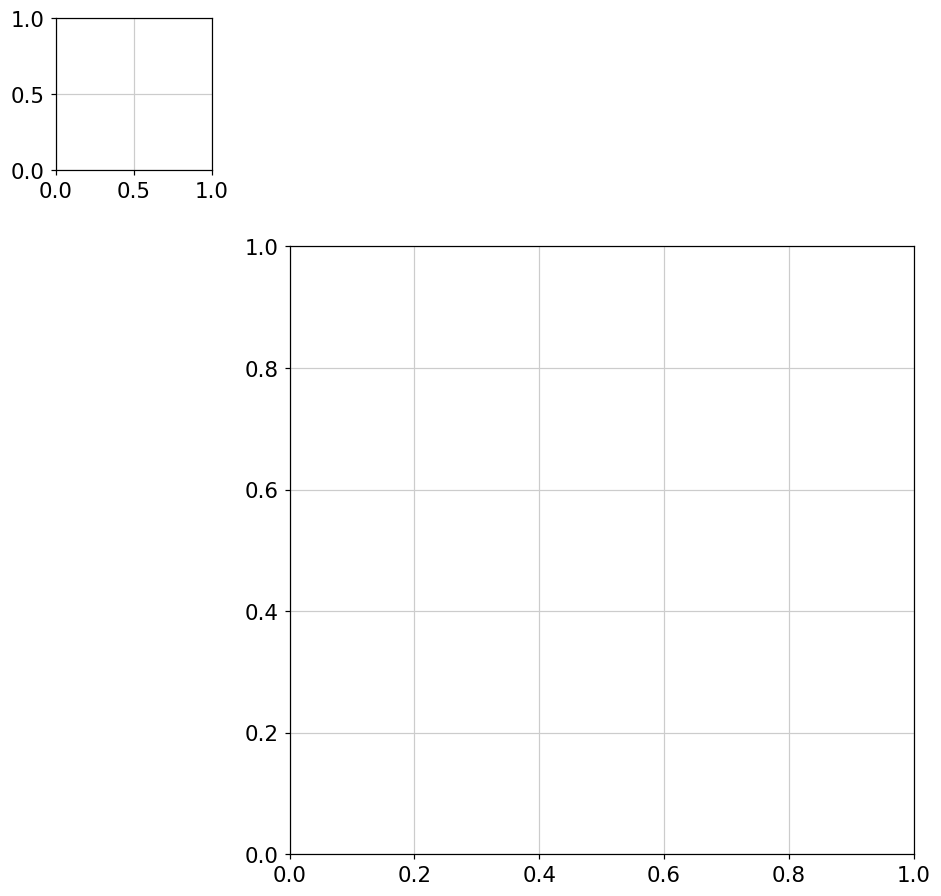

In [117]:

g = sns.clustermap(hm, cmap='Reds', annot=hm, fmt='')

order_leiden = g.dendrogram_row.reordered_ind
plt.subplots_adjust(bottom=.6, right=.6)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.savefig('../data/figures/heatmap_counts_per_condition_leiden_revision.pdf')
plt.close()


In [104]:
hm_others.reindex(order_leiden)

NameError: name 'order_leiden' is not defined

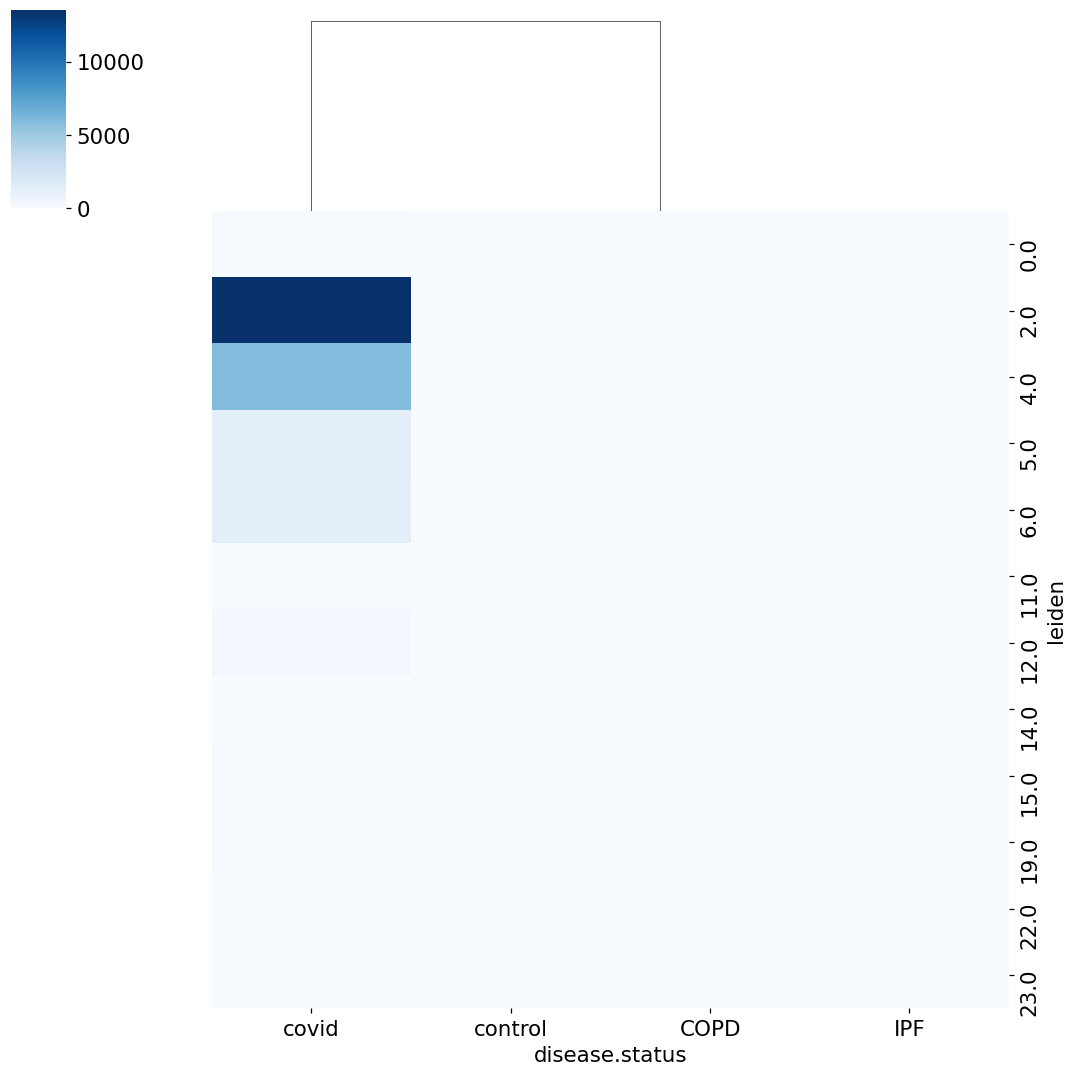

In [105]:
sns.clustermap(hm_others, row_cluster=False, cmap='Blues') #  annot=hm_others.fillna(0)) # fmt='')

In [106]:
hm_others.index = hm_others.index.astype(int)
hm_others = hm_others.reindex(order_leiden)
g = sns.clustermap(hm_others.fillna(0), row_cluster=False, cmap='Blues', annot=hm_others.fillna(0), fmt='')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.subplots_adjust(bottom=.6, right=.3)
plt.savefig('../data/figures/heatmap_counts_per_condition_leiden_disease_status_morse_or_adams_revision.pdf')
plt.close()

NameError: name 'order_leiden' is not defined

### annotate based on uniquely mapped cells from the previous notebook (06_see_results_scvi_by_bals).

In [108]:
final = sc.read_h5ad('../data/bal_cells_uniquely_mapped.h5ad')

In [109]:
final.obs.groupby(['closest.disease.status', 'mdm.type']).size().reset_index().sort_values('mdm.type')

,closest.disease.status,mdm.type,0
0,COPD,AM 1,0
14,control,AM 1,1
7,IPF,AM 1,26
1,COPD,AM 2,3
15,control,AM 2,11
8,IPF,AM 2,10
2,COPD,MDM 1,11
16,control,MDM 1,196
9,IPF,MDM 1,78
17,control,MDM 2,88


In [121]:
final.obs

,GSM,sample.id,n_counts,log_counts,n_genes,mt_frac,patient.id,cell.type,study,disease.status,...,age,sex,Celltype_2,Timepoint,ident,mdm.type,selection,closest.disease.status,index.bc,leiden
GCAGCTGAGCCACTCG-3-1-0-0,nan,nan,20578.0,NaN,NaN,NaN,C19-83,Macrophages,BAL,MDM 3A,...,56,Female,Macrophages,Intermediate,4,MDM 3A,MDM 3A:COPD,COPD,GCAGCTGAGCCACTCG,NaN
GGATGTTGTACAACGG-3-1-0-0,nan,nan,17231.0,NaN,NaN,NaN,C19-83,Macrophages,BAL,MDM 3A,...,56,Female,Macrophages,Intermediate,4,MDM 3A,MDM 3A:COPD,COPD,GGATGTTGTACAACGG,NaN
TAGGGTTAGACATATG-3-1-0-0,nan,nan,12357.0,NaN,NaN,NaN,C19-83,Macrophages,BAL,MDM 3A,...,56,Female,Macrophages,Intermediate,4,MDM 3A,MDM 3A:COPD,COPD,TAGGGTTAGACATATG,NaN
GCACTAAGTCTGCCTT-6-1-0-0,nan,nan,23267.0,NaN,NaN,NaN,C19-98,Macrophages,BAL,MDM 3A,...,63,Male,Macrophages,Intermediate,37,MDM 3A,MDM 3A:COPD,COPD,GCACTAAGTCTGCCTT,NaN
GTTAGACAGCTCTTCC-6-1-0-0,nan,nan,42924.0,NaN,NaN,NaN,C19-98,Macrophages,BAL,MDM 3A,...,63,Male,Macrophages,Intermediate,37,MDM 3A,MDM 3A:COPD,COPD,GTTAGACAGCTCTTCC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCATACTGTGGCGCTT-8-1-1,nan,nan,2699.0,NaN,NaN,NaN,C19-120,Macrophages,BAL,MDM 1,...,nan,Male,Macrophages,Late,17,MDM 1,MDM 1:control,control,TCATACTGTGGCGCTT,NaN
TCGATTTCAACCACAT-8-1-1,nan,nan,4655.0,NaN,NaN,NaN,C19-120,Macrophages,BAL,MDM 1,...,nan,Male,Macrophages,Late,17,MDM 1,MDM 1:control,control,TCGATTTCAACCACAT,NaN
TGTAAGCCAGGTCCGT-8-1-1,nan,nan,4622.0,NaN,NaN,NaN,C19-120,Macrophages,BAL,MDM 1,...,nan,Male,Macrophages,Late,17,MDM 1,MDM 1:control,control,TGTAAGCCAGGTCCGT,NaN
TGTACAGCATCCGAAT-8-1-1,nan,nan,13354.0,NaN,NaN,NaN,C19-120,Macrophages,BAL,MDM 1,...,nan,Male,Macrophages,Late,17,MDM 1,MDM 1:control,control,TGTACAGCATCCGAAT,NaN


In [122]:
ad.obs['study'].value_counts()

adams       90477
budinger    22810
morse       17551
BAL          7503
Name: study, dtype: int64

In [123]:
final.obs['study'].value_counts()

BAL    930
Name: study, dtype: int64

In [124]:
ad_bal.obs['study'].value_counts()

BAL    7503
Name: study, dtype: int64

In [125]:
final.obs['index.bc'] = final.obs.index.str.split('-').str[0]
ad_bal.obs['index.bc'] = ad_bal.obs.index.str.split('-').str[0]

In [126]:
final.obs['leiden'] = final.obs['index.bc'].str.split('-').str[0].map(ad_bal.obs.set_index('index.bc')['leiden'].to_dict())

In [127]:
hm_final = final.obs[['leiden', 'mdm.type']].groupby(['leiden', 'mdm.type']).size().reset_index().pivot('leiden', 'mdm.type', 0)
hm_final.index = hm_final.index.astype(int)
hm_final = hm_final.reindex(order_leiden).fillna(0)
print(hm_final.sum())

g = sns.clustermap(hm_final, row_cluster=False, cmap='Greens', annot=hm_final.fillna(0).astype(int), fmt='')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.subplots_adjust(bottom=.6, right=.6)
plt.savefig('data/figures/heatmap_counts_per_condition_leiden_disease_status_mdm_filtered_connectivity_uniq.pdf')
plt.close()

NameError: name 'order_leiden' is not defined

In [128]:
final

AnnData object with n_obs × n_vars = 930 × 18331
    obs: 'GSM', 'sample.id', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'patient.id', 'cell.type', 'study', 'disease.status', 'MP.markers.score', 'MP.others.score', 'MP.all.score', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'Subject_Identity', 'Library_Identity', 'groups', 'batch', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'viral_counts', 'viral_ratio', 'viral_norm', 'percent.mt', 'number', 'dataset', 'S.Score', 'G2M.Score', 'Phase', 'CC.Difference', 'SR.score1', 'dissoc.score1', 'Label', 'nCount_VIRAL', 'nFeature_VIRAL', 'seurat_clusters', 'RNA_mnn_40_Leiden_res.0.1', 'RNA_mnn_40_Leiden_res.0.2', 'RNA_mnn_40_Leiden_res.0.3', 'RNA_mnn_40_Leiden_res.0.4', 'RNA_mnn_40_Leiden_res.0.5', 'RNA_mnn_40_Leiden_res.0.6', 'RNA_mnn_40_Leiden_res.0.7', 'RNA_mnn_40_Leiden_res.0.8', 'RNA_mnn_40_Leiden_res.0.9', 'RNA_mnn_40_Leiden_res.1', 'RNA_mnn_40_Leiden_res.1.5', 'RNA_mnn_40_Leid

In [129]:
final.obs['leiden'].value_counts().sum()

0

In [130]:
var_names = set(ad.var.index)
marker_genes_all = [g for g in get_marker_genes_ipf()['MP.all'] if g in var_names] 

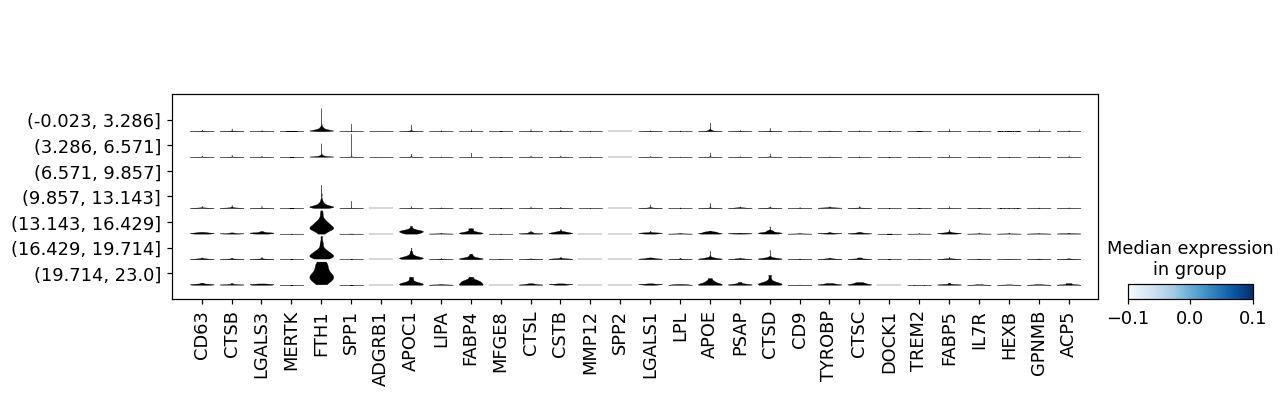

In [131]:
sc.pl.stacked_violin(ad, var_names=marker_genes_all, groupby='leiden') # dendrogram=True)

In [132]:
ad_bal[ad_bal.obs['study'] == 'morse',:].obs['cell.type'].value_counts()

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Series([], Name: cell.type, dtype: int64)

In [133]:
ad.to_df()['SPP1'].describe()

count    138341.000000
mean          1.709933
std           3.036393
min           0.000000
25%           0.000000
50%           0.000000
75%           3.777106
max          11.851416
Name: SPP1, dtype: float64

In [134]:
bal.var

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable,ensembl,symbol
AL627309.1,0.004206,0.004324,0.006471,0.668145,0,ENSG00000238009,AL627309.1
AL627309.3,0.000362,0.000407,0.000421,0.965306,0,ENSG00000239945,AL627309.3
AL627309.4,0.001357,0.001355,0.001767,0.766767,0,ENSG00000241599,AL627309.4
AL669831.2,0.000430,0.000429,0.000507,0.846792,0,ENSG00000229905,AL669831.2
AL669831.5,0.062744,0.076084,0.107797,0.705806,0,ENSG00000237491,AL669831.5
...,...,...,...,...,...,...,...
AL354822.1,0.049721,0.062037,0.086614,0.716248,0,ENSG00000278384,AL354822.1
AC004556.1,0.082551,0.191010,0.142380,1.341548,0,ENSG00000276345,AC004556.1
AC233755.2,0.008298,0.256907,0.014290,8.053228,1,ENSG00000277856,AC233755.2
AC233755.1,0.008117,0.099807,0.013935,6.890781,1,ENSG00000275063,AC233755.1


### Save a copy of obs in compressed format for inspection (Oliver).

In [135]:
ad.shape

(138341, 17656)

In [136]:
!readlink -f .

/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/revision


In [137]:
for c in ad.obs.columns:
    print(c)
    print(ad.obs[c].value_counts())
    print('')

GSM
nan           120790
GSM3660648      2104
GSM3660644      1935
GSM3660646      1743
GSM3660647      1733
GSM3660652      1519
GSM3660651      1371
GSM3660658      1323
GSM3660653      1223
GSM3660657      1099
GSM3660645      1080
GSM3660655       842
GSM3660654       509
GSM3660656       415
GSM3660643       239
GSM3660642       213
GSM3660641       203
Name: GSM, dtype: int64

sample.id
nan            120790
SC156NORUP       2104
SC45NOR          1935
SC59NOR          1743
SC155NORLOW      1733
SC88IPFUP        1519
SC87IPFLOW       1371
SC154IPFUP       1323
SC89IPFLOW       1223
SC153IPFLOW      1099
SC56NOR          1080
SC94IPFUP         842
SC93IPFLOW        509
SC95IPFLOW        415
SC31DNOR          239
SC31NOR           213
SC14NOR           203
Name: sample.id, dtype: int64

n_counts
4248.0     28
4106.0     27
4345.0     26
6596.0     26
1554.0     26
           ..
92878.0     1
50975.0     1
32869.0     1
22510.0     1
61597.0     1
Name: n_counts, Length: 26374, dtype

In [138]:
obs = ad.obs
print(obs.shape)
obs.to_csv('barcodes_cluster_annotation.csv.gz', compression='gzip')


(138341, 80)


In [139]:
ad.shape

(138341, 17656)

In [141]:
rcParams['figure.dpi'] = 80
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(12, 10))
ax = ax.flatten()

marker_genes = ['TREM2', 'SPP1', 'CD9', 'LPL', 'FABP4']
for pi, g in enumerate(marker_genes):
    sc.pl.umap(ad, color=g, title=g, use_raw=False, ax=ax[pi], show=False)

plt.subplots_adjust(bottom=.3)

save = 1 # 1
if save:
    plt.savefig('figures/marker_genes.pdf')
    plt.close()

### Define custom colors for MDMs.

In [142]:
sc.__version__

'1.7.2'

In [143]:
import scipy

In [144]:
scipy.__version__

'1.5.2'

In [145]:
import numpy as np

In [146]:
matplotlib.__version__

'3.3.3'

In [149]:
ad.obs['mdm.type'].value_counts()

Others (A/M/B)     130838
2 Mono/Mp            2951
3 SPP1/LGMN-Mp       1190
1 FCN1-Mono           992
5 INHBA-AMp           916
4 SPP1/TREM2-Mp       819
Others (COVID)        358
6 Prolif. AMp         175
Low quality           102
Name: mdm.type, dtype: int64

In [150]:
# color_map = {"MDM 1": "#009E73",
#              "MDM 2": "#E69F00",
#              "MDM 3A": "#D55E00",
#             "MDM 3B": "#A020F0",
#             "AM 2": "#0072B2",
#             "AM 1": "#56B4E9",
#             "Undefined": "#999999",
#             # 'BALF': 'gray',
#             'Others (COVID)' : 'lightgray',
#             'Others (Adams/Morse/Budinger)': 'lightgray'}

color_map = {
          "1 FCN1-Mono": "#009E73",
          "2 Mono/Mp": "#E69F00",
          "3 SPP1/LGMN-Mp": "#D55E00",
          "4 SPP1/TREM2-Mp": "#A020F0",
          "5 INHBA-AMp": "#0072B2",
          "6 Prolif. AMp": "#56B4E9",
          "Low quality": "#999999",
          # 'BALF': 'gray',
          'Others (COVID)' : 'lightgray',
          'Others (A/M/B)': 'lightgray'}

ad.obs['mdm.type'] = ad.obs['mdm.type'].astype('category')

ad.obs['disease.status'] = ad.obs['disease.status'].str.replace('Control', 'control')


colors = ad.obs['mdm.type'].cat.categories.map(color_map)
ad.uns['mdm.type_colors'] = ad.obs['mdm.type'].cat.categories.map(color_map)

In [151]:
print('here...')

here...


In [152]:
ad[ad.obs['mdm.type'] != 'Others (A/M/B)',:].obs['mdm.type'].value_counts()

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


2 Mono/Mp          2951
3 SPP1/LGMN-Mp     1190
1 FCN1-Mono         992
5 INHBA-AMp         916
4 SPP1/TREM2-Mp     819
Others (COVID)      358
6 Prolif. AMp       175
Low quality         102
Name: mdm.type, dtype: int64

In [153]:
ad.uns['mdm.type_colors'].value_counts()

lightgray    2
#999999      1
#E69F00      1
#009E73      1
#56B4E9      1
#0072B2      1
#A020F0      1
#D55E00      1
dtype: int64

In [154]:
ad.obs['mdm.type'].cat.categories

Index(['1 FCN1-Mono', '2 Mono/Mp', '3 SPP1/LGMN-Mp', '4 SPP1/TREM2-Mp',
       '5 INHBA-AMp', '6 Prolif. AMp', 'Low quality', 'Others (A/M/B)',
       'Others (COVID)'],
      dtype='object')

In [155]:
ad.obs['disease.status'] = ad.obs['disease.status'].str.replace('Control', 'control')
ad.obs['disease.status'] = np.where(ad.obs['disease.status'].str.contains('nan'), 'BAL', ad.obs['disease.status'])
ad.obs['cell.type'] = np.where(ad.obs['cell.type'].str.contains('nan'), ad.obs['Subclass_Cell_Identity'], ad.obs['cell.type'])
ad.obs['cell.type'] = np.where(ad.obs['cell.type'].str.contains('nan'), ad.obs['Celltype_2'], ad.obs['cell.type'])

In [156]:
sc.set_figure_params(vector_friendly=True)

In [157]:
ad.obs['disease.status'] = np.where(ad.obs['disease.status'].isin({'BAL (NA)', 'covid'}),
                                    ad.obs['disease.status'].map({'BAL (NA)': 'COVID-19 (this work)', 'covid': 'COVID-19 (Budinger)'}),
                                    ad.obs['disease.status'])

In [158]:
ad.obs['disease.status'].value_counts().sum()

138341

In [159]:
ad.obs['disease.status'].value_counts()

control                 39409
IPF                     38460
COPD                    30159
COVID-19 (Budinger)     22810
COVID-19 (this work)     7503
Name: disease.status, dtype: int64

In [160]:
# define colors for the disease.status
color_map = {
          "IPF": "#249d68",
          "COVID-19 (this work)": "#2177b4",
          "COVID-19 (Budinger)": "#d52928",
          "COPD": "#f47e1f",
          "control": "lightgray"}

ad.obs['disease.status'] = ad.obs['disease.status'].astype('category')
colors = ad.obs['disease.status'].cat.categories.map(color_map)
ad.uns['disease.status_colors'] = ad.obs['disease.status'].cat.categories.map(color_map)

In [161]:
print(ad.obs['disease.status'].cat.categories, ad.uns['disease.status_colors'])

Index(['COPD', 'COVID-19 (Budinger)', 'COVID-19 (this work)', 'IPF',
       'control'],
      dtype='object') Index(['#f47e1f', '#d52928', '#2177b4', '#249d68', 'lightgray'], dtype='object')


In [162]:
ad.obs['is.others'] = ad.obs['mdm.type'].str.contains('Others')
ad_copy = ad[ad.obs.sort_values('is.others', ascending=False).index,:]

In [163]:
# make a copy of the whole object before plotting
print(ad.obs['disease.status'].cat.categories, ad.uns['disease.status_colors'])

Index(['COPD', 'COVID-19 (Budinger)', 'COVID-19 (this work)', 'IPF',
       'control'],
      dtype='object') Index(['#f47e1f', '#d52928', '#2177b4', '#249d68', 'lightgray'], dtype='object')


In [164]:
rcParams['figure.figsize'] = [12, 5]
rcParams['figure.dpi'] = 100
ax = plt.subplot(1, 2, 1)


print('plotting 1st...')
sc.pl.umap(ad_copy, color='mdm.type', title='mdm.type', size=np.where(ad_copy.obs['mdm.type'].astype(str) == 'Others (A/M/B)', 1.0, 25),
           ax=ax, show=False) # colors)

# plt.xlabel('UMAP1'); plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(1, 2, 2)
print('plotting 2nd...')
sc.pl.umap(ad_copy, color='disease.status', title='disease.status', size=np.where(ad_copy.obs['disease.status'].astype(str) == 'nan', 5.0, 5.0),
           ax=ax, show=False)

plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

plt.subplots_adjust(bottom=.35)

plt.savefig('../data/figures/mdm_and_disease_status_revision.pdf')
plt.close()



/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.


plotting 1st...


... storing 'cell.type' as categorical


plotting 2nd...


In [165]:
print('here...')

here...


In [166]:
ad.obs['disease.status'].value_counts()

control                 39409
IPF                     38460
COPD                    30159
COVID-19 (Budinger)     22810
COVID-19 (this work)     7503
Name: disease.status, dtype: int64

In [167]:
print(ad.obs['disease.status'].value_counts().sum())

138341


In [168]:
print('done...')

done...


In [169]:
sc.tl.embedding_density(ad, groupby='disease.status')

... storing 'cell.type' as categorical


In [170]:
sc.set_figure_params(facecolor='white')

In [171]:
ad

AnnData object with n_obs × n_vars = 138341 × 17656
    obs: 'GSM', 'sample.id', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'patient.id', 'cell.type', 'study', 'disease.status', 'MP.markers.score', 'MP.others.score', 'MP.all.score', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'Subject_Identity', 'Library_Identity', 'groups', 'batch', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'viral_counts', 'viral_ratio', 'viral_norm', 'percent.mt', 'number', 'dataset', 'S.Score', 'G2M.Score', 'Phase', 'CC.Difference', 'SR.score1', 'dissoc.score1', 'Label', 'nCount_VIRAL', 'nFeature_VIRAL', 'seurat_clusters', 'RNA_mnn_40_Leiden_res.0.1', 'RNA_mnn_40_Leiden_res.0.2', 'RNA_mnn_40_Leiden_res.0.3', 'RNA_mnn_40_Leiden_res.0.4', 'RNA_mnn_40_Leiden_res.0.5', 'RNA_mnn_40_Leiden_res.0.6', 'RNA_mnn_40_Leiden_res.0.7', 'RNA_mnn_40_Leiden_res.0.8', 'RNA_mnn_40_Leiden_res.0.9', 'RNA_mnn_40_Leiden_res.1', 'RNA_mnn_40_Leiden_res.1.5', 'RNA_mnn_40_L

In [172]:
# ad.obs[lab] = ad.obs[lab].astype(float)
sc.tl.embedding_density(ad, basis='umap', groupby='disease.status')

In [173]:
abspath('mdm_and_disease_status_density_revision.pdf')

'/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/revision/mdm_and_disease_status_density_revision.pdf'

In [174]:
print('here...')

here...


In [175]:
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 100
# ax = plt.subplot()
fig = sc.pl.embedding_density(ad, basis='umap', key='umap_density_disease.status', show=False,
                             save='mdm_and_disease_status_density_revision.pdf') #  group='is.BAL')
# plt.savefig('data/figures/mdm_and_disease_status_density.pdf')
# plt.close()

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1186: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1187: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:370

### Make a second density now highlighting the respective MDM from this work and the ones from Budinger.

In [176]:
# ad.obs[lab] = ad.obs[lab].astype(float)
sc.tl.embedding_density(ad, basis='umap', groupby='mdm.type')

In [177]:
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 100
# ax = plt.subplot()
fig = sc.pl.embedding_density(ad, basis='umap', key='umap_density_mdm.type', show=False,
                             save='mdm.type_density_revision.pdf', color_map='Greens') #  group='is.BAL')

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1186: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greens"))
  color_map.set_over('black')
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1187: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greens"))
  color_map.set_under('lightgray')


In [180]:
# ad.obs[lab] = ad.obs[lab].astype(float)
sc.tl.embedding_density(ad, basis='umap', groupby='Cluster')

In [182]:
ad.obs['Cluster'].value_counts()

nan          115531
MoM2          10453
MoM3           8845
Monocytes      1968
AM1            1030
AM2             290
MoM1            224
Name: Cluster, dtype: int64

In [181]:
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 100
# ax = plt.subplot()
fig = sc.pl.embedding_density(ad, basis='umap', key='umap_density_Cluster', show=False,
                             save='Cluster_density_revision.pdf', color_map='Greens') #  group='is.BAL')

In [115]:
ad.obs.columns

Index(['GSM', 'sample.id', 'n_counts', 'log_counts', 'n_genes', 'mt_frac',
       'patient.id', 'cell.type', 'study', 'disease.status',
       'MP.markers.score', 'MP.others.score', 'MP.all.score', 'nUMI', 'nGene',
       'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity',
       'Disease_Identity', 'Subject_Identity', 'Library_Identity', 'groups',
       'batch', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'viral_counts',
       'viral_ratio', 'viral_norm', 'percent.mt', 'number', 'dataset',
       'S.Score', 'G2M.Score', 'Phase', 'CC.Difference', 'SR.score1',
       'dissoc.score1', 'Label', 'nCount_VIRAL', 'nFeature_VIRAL',
       'seurat_clusters', 'RNA_mnn_40_Leiden_res.0.1',
       'RNA_mnn_40_Leiden_res.0.2', 'RNA_mnn_40_Leiden_res.0.3',
       'RNA_mnn_40_Leiden_res.0.4', 'RNA_mnn_40_Leiden_res.0.5',
       'RNA_mnn_40_Leiden_res.0.6', 'RNA_mnn_40_Leiden_res.0.7',
       'RNA_mnn_40_Leiden_res.0.8', 'RNA_mnn_40_Leiden_res.0.9',
       'RNA_mnn_40_Leiden_res.1'

In [117]:
ad.obs['mdm.type.spp1.and.lgmn'] = np.where(ad.obs['mdm.type'].astype(str).isin({"3 SPP1/LGMN-Mp", "4 SPP1/TREM2-Mp"}), 'SPP1/TREM2+SPP1', ad.obs['mdm.type'])

In [ ]:
# ad.obs[lab] = ad.obs[lab].astype(float)
sc.tl.embedding_density(ad, basis='umap', groupby='mdm.type.spp1.and.lgmn')

... storing 'mdm.type.spp1.lgmn1.merged' as categorical
... storing 'mdm.type.spp1+lgmn.merged' as categorical
... storing 'mdm.type.spp1.and.lgmn' as categorical


In [129]:
ad.obs['mdm.type.spp1.and.lgmn'].value_counts()

Others (A/M/B)     130838
2 Mono/Mp            2951
SPP1/TREM2+SPP1      2009
1 FCN1-Mono           992
5 INHBA-AMp           916
Others (COVID)        358
6 Prolif. AMp         175
Low quality           102
Name: mdm.type.spp1.and.lgmn, dtype: int64

In [108]:
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 100
# ax = plt.subplot()
fig = sc.pl.embedding_density(ad, basis='umap', key='umap_density_mdm.type.spp1.and.lgmn', show=False,
                             save='mdm.type.spp1.and.lgmn_density_revision.pdf', color_map='Greens') #  group='is.BAL')

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greens"))
  color_map.set_over('black')
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1183: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greens"))
  color_map.set_under('lightgray')
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:371

### Finally, prepare an embedding density only showing the cells that are MoAM 4/2/3

In [122]:
budinger = get_budinger()

budinger
scoring MP.markers 20


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


scoring MP.others 10


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


scoring MP.all 31


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [123]:
mdm_type_by_bc = budinger.obs.set_index('Unnamed: 0')['Cell Type'].to_dict()
ad.obs['mdm.type'] = np.where(ad.obs['study'] == 'budinger', ad.obs['Unnamed: 0'].map(mdm_type_by_bc), ad.obs['mdm.type'])
ad.obs['disease.status'] = np.where((ad.obs['study'] == 'budinger'), ad.obs['mdm.type'], ad.obs['disease.status'])

In [124]:
ad.obs['disease.status'].value_counts()

control                 39409
IPF                     38460
COPD                    30159
MoAM-1                   8188
MoAM-2                   7665
COVID-19 (this work)     7503
MoAM-3                   5037
TRAM-2                    842
TRAM-1                    822
MoAM-4                    129
TRAM-3                    127
Name: disease.status, dtype: int64

In [132]:
# ad.obs[lab] = ad.obs[lab].astype(float)
sc.tl.embedding_density(ad, basis='umap', groupby='key.budinger')

... storing 'key.budinger' as categorical


In [133]:
fig = sc.pl.embedding_density(ad, basis='umap', key='umap_density_key.budinger', show=False,
                             save='key.budinger_density_revision.pdf', color_map='Greens') #  group='is.BAL')

In [126]:
# ad.obs[lab] = ad.obs[lab].astype(float)
ad.obs['label.MoAM.merged'] = np.where(ad.obs['disease.status'].isin({'MoAM-4', 'MoAM-3', 'MoAM-2'}), 'MoAM-2/3/4', ad.obs['disease.status'])
sc.tl.embedding_density(ad, basis='umap', groupby='label.MoAM.merged')

... storing 'label.MoAM.merged' as categorical


In [128]:
ad.obs['label.MoAM.merged'].value_counts()

control                 39409
IPF                     38460
COPD                    30159
MoAM-2/3/4              12831
MoAM-1                   8188
COVID-19 (this work)     7503
TRAM-2                    842
TRAM-1                    822
TRAM-3                    127
Name: label.MoAM.merged, dtype: int64

In [127]:
fig = sc.pl.embedding_density(ad, basis='umap', key='umap_density_label.MoAM.merged', show=False,
                             save='label.MoAM.merged_density_revision.pdf', color_map='Greens') #  group='is.BAL')

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greens"))
  color_map.set_over('black')
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1183: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greens"))
  color_map.set_under('lightgray')
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:371

In [151]:
fig

[<AxesSubplot:title={'center':'COPD'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'COVID-19 (Budinger)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'COVID-19 (this work)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'IPF'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'control'}, xlabel='UMAP1', ylabel='UMAP2'>]

In [302]:
# adpbmc = sc.datasets.pbmc68k_reduced()
# sc.tl.umap(adpbmc)
# sc.tl.embedding_density(adpbmc, basis='umap', groupby='phase')
# sc.pl.embedding_density(adpbmc, basis='umap', key='umap_density_phase', group='G1')
# sc.pl.embedding_density(adpbmc, basis='umap', key='umap_density_phase', group='S')

0 IPF
False    132783
True      94303
Name: is.IPF, dtype: int64


ValueError: Please run `sc.tl.embedding_density()` first and specify the correct key.

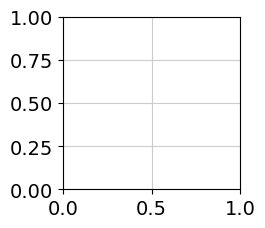

In [187]:
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 100

for show_everything in [True, False]:
    pi = 0
    for condition in set(ad.obs['disease.status']):
        print(pi, condition)
        ax = plt.subplot(2, 2, pi + 1)
        pi += 1
        lab = 'is.%s' % condition
        ad.obs[lab] = (ad.obs['disease.status'] == condition).astype('category')

        n_true = sum(ad.obs[lab] == True)
        print(ad.obs[lab].value_counts())

        # sc.pl.umap(ad[(ad.obs[lab] == True) | show_everything,:], color=lab, title=condition + ', n=%i' % n_true,
        #            size=np.where(ad[(ad.obs[lab] == True) | show_everything,:].obs[lab], 1.0, .5), sort_order=False,
        #            ax=ax, show=False, palette=['gray', 'red'])
        

                
        sc.tl.embedding_density(ad, groupby=lab)
        # sc.pl.umap(ad, color=lab, title=condition + ', n=%i' % n_true,
        #            size=np.where(ad.obs[lab] == True, 1.0, 0 if not show_everything else .1), sort_order=False,
        #            ax=ax, show=False, palette=['gray', 'red'])

        sc.pl.embedding_density(ad, color=lab, title=condition + ', n=%i' % n_true,
                                size=np.where(ad.obs[lab] == True, 1.0, 0 if not show_everything else .1), sort_order=False,
                                ax=ax, show=False, palette=['gray', 'red'])

        ax.get_legend().remove()
        plt.xlabel('UMAP1')
        plt.ylabel('UMAP2')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
        print('next...')
    plt.savefig('../data/figures/mdm_and_disease_status_show_bg_%s.pdf' % show_everything)
    plt.close()
plt.tight_layout()
plt.subplots_adjust(bottom=.35)

    

In [180]:
print('here...')

here...


In [153]:
markers = ["LGMN", "MERTK", "INHBA", "MRC1", "CD9", "TGFBI", "TGFB1",
           "MMP9", "TREM2", "APOE", "FABP4", "S100A8", "FCN1", "C1QA",
           "CCL2", "CCR2", "CCL8", "CCL13", "MARCKS", "SPP1", 'CCL18']

In [154]:
print(len(markers))

21


In [155]:
# Fix export PDF as text issue
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [156]:
sc.set_figure_params(vector_friendly=True)

In [157]:
fig, ax = plt.subplots(nrows = 3, ncols = 7, figsize=(22.5, 10))
ax = ax.flatten()

for gi, g in enumerate(markers):
    print(gi,  g in set(ad.var.index))
    if not g in set(ad.var.index):
        continue
    sc.pl.umap(ad, color=g, title=g, ax=ax[gi], show=False, use_raw=False, vmin=0, vmax=10, cmap='magma_r')
    # ax[gi].get_legend().remove()
    plt.xlabel('')
    plt.ylabel('')
    ax[gi].spines['right'].set_visible(False)
    ax[gi].spines['top'].set_visible(False)
    ax[gi].spines['left'].set_visible(False)
    ax[gi].spines['bottom'].set_visible(False)
    
plt.savefig('../data/figures/marker_genes_extended_revision.pdf')
plt.close()


0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True


In [158]:
abspath('../data/figures/marker_genes_extended_revision.pdf')

'/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/data/figures/marker_genes_extended_revision.pdf'

Index(['SC154IPFUP_AAACCTGCATCACGAT-1-0-0',
       'SC154IPFUP_AAACGGGGTACCGGCT-1-0-0',
       'SC154IPFUP_AAACGGGTCTGTCCGT-1-0-0',
       'SC154IPFUP_AAAGATGAGATCCCGC-1-0-0',
       'SC154IPFUP_AAAGATGAGATGCGAC-1-0-0',
       'SC154IPFUP_AAAGATGAGTCCGGTC-1-0-0',
       'SC154IPFUP_AAAGCAAAGTCCGTAT-1-0-0',
       'SC154IPFUP_AAAGCAAGTGAAGGCT-1-0-0',
       'SC154IPFUP_AAAGCAATCGAGAACG-1-0-0',
       'SC154IPFUP_AAAGTAGAGGGCATGT-1-0-0',
       ...
       'TTCCTAAAGTGCTCAT-8-1', 'TTCCTCTCATCAGTCA-8-1', 'TTGATGGAGTTGCTGT-8-1',
       'TTGCCTGAGCAACAAT-8-1', 'TTGGATGTCAACCGAT-8-1', 'TTGGGATCAGCTACTA-8-1',
       'TTTGACTAGGTTCTTG-8-1', 'TTTGGTTCAAGTGCTT-8-1', 'TTTGTTGCAATGAGCG-8-1',
       'TTTGTTGGTAGTAAGT-8-1'],
      dtype='object', length=77662)

In [170]:
ad.obs[['study', 'patient.id', 'disease.status']].drop_duplicates('patient.id')

,study,patient.id,disease.status
SC154IPFUP_AAACCTGCATCACGAT-1-0-0,morse,SC154,IPF
SC56NOR_AAACCTGCACGGTAGA-1-0-0,morse,SC56,control
SC93IPFLOW_AAACCTGCAGGTCCAC-1-0-0,morse,SC93,IPF
SC155NORLOW_AAACCTGAGACAAGCC-1-0-0,morse,SC155,control
SC14NOR_AAAGATCTTTACTC-1-0-0,morse,SC14,control
...,...,...,...
AAACCCACAAGACGGT-4-1,BAL,C19-82,BAL
AAACCCATCGCAGATT-5-1,BAL,C19-85,BAL
AAACGAACATTGCAAC-6-1,BAL,C19-98,BAL
AAACCCAGTCGCACGT-7-1,BAL,C19-136,BAL


In [169]:
patient_metadata = ad.obs[['study', 'patient.id', 'disease.status']].drop_duplicates('patient.id') # ['study'].value_counts()
print(ad.obs[['study', 'patient.id', 'disease.status']].drop_duplicates('patient.id').groupby(['study','disease.status']).size())
patient_metadata.to_csv('data/patient_integration_metadata.tsv', sep='\t', index=None)

study  disease.status
BAL    BAL                7
       COPD               0
       IPF                0
       control            0
adams  BAL                0
       COPD              18
       IPF               32
       control           28
morse  BAL                0
       COPD               0
       IPF                8
       control            8
dtype: int64
